# Parte 1
## Lendo o arquivo .csv + gráfico simples

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dados.csv', sep = ';')
df

,Experiencia,salario
0,1,3300
1,2,3500
2,3,3600
3,4,4000
4,5,4100
5,6,4500
6,7,5000
7,8,5500
8,9,5580
9,10,6000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Experiencia  20 non-null     int64
 1   salario      20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes


In [4]:
# Podemos selecionar apenas uma coluna do DataFrame
df['Experiencia']

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: Experiencia, dtype: int64

In [5]:
# Podemos transformar ele em um array (precisamos do Numpy)

df['Experiencia'].values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [6]:
df['salario'].values

array([ 3300,  3500,  3600,  4000,  4100,  4500,  5000,  5500,  5580,
        6000,  6250,  6300,  6380,  6500,  8000,  8500,  9000, 10500,
       12000, 12500])

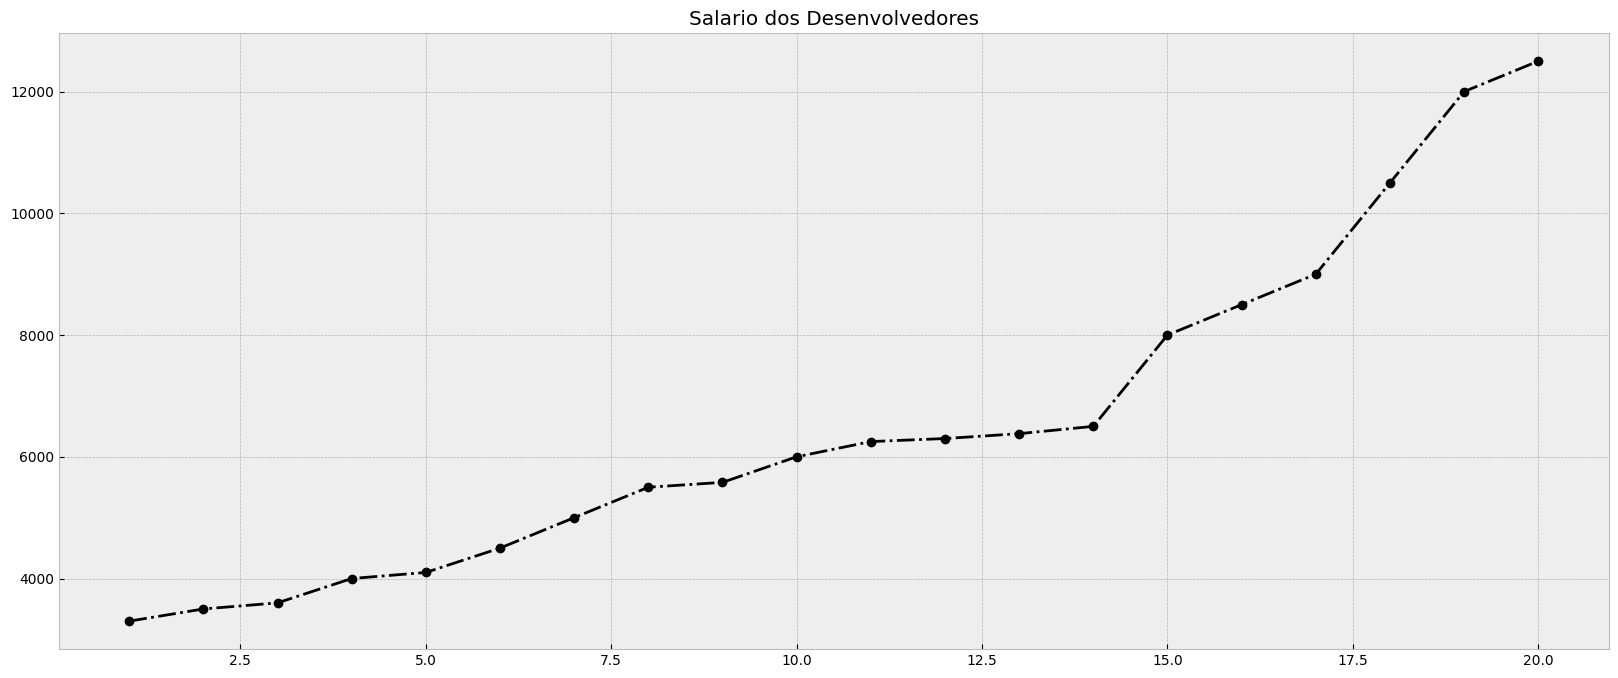

In [7]:
plt.figure(figsize=(20,8))
plt.style.use("bmh")

plt.title("Salario dos Desenvolvedores")
# Passando os dados do dataframe para o gráfico

plt.plot(df['Experiencia'].values, df['salario'].values,
         color = 'black', linestyle = '-.' ,marker = 'o')

plt.grid(True)
plt.show()

# Parte 2 : Adicionando a equação da reta no gráfico

In [8]:
### VAMOS ADICIONAR A EQUAÇAO DA RETA NO GRÁFICO
## Método .iloc

# df['Experiencia'].values
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values

In [9]:
print( "Valor de X e de y",

    print('Menor valor de X:', np.min(X), ';',
          'Maior valor de X:', np.max(X)) ,
    print('Menor valor de y:', np.min(y), ';',
          'Maior valor de y:', np.max(y))

)

Menor valor de X: 1 ; Maior valor de X: 20
Menor valor de y: 3300 ; Maior valor de y: 12500
Valor de X e de y None None


$$m = \frac{y1 - y2}{X1 - X2}$$

In [10]:
m = ( (np.max(y) - np.min(y)) / (np.max(X) - np.min(X) ) )
m

484.2105263157895

$$b = y - (m * X1)$$

In [11]:
b = np.min(y) - m * np.min(X)
b

2815.7894736842104

In [12]:
m, b

(484.2105263157895, 2815.7894736842104)

In [13]:
## vamos criar uma lista de valores de X para plotar no gráfico
## Lembrando que para plotar uma reta precisamos apenas de dois pontos.

X_values = [np.min(X) - 1, np.max(X) + 1]
X_values, type(X_values)

([0, 21], list)

In [14]:
## Modo convencional
for x_val in X_values:
     print(m * x_val + b)

2815.7894736842104
12984.210526315788


In [15]:
y_values = [m * x_val + b for x_val in X_values]
y_values, type(y_values)

([2815.7894736842104, 12984.210526315788], list)

In [16]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


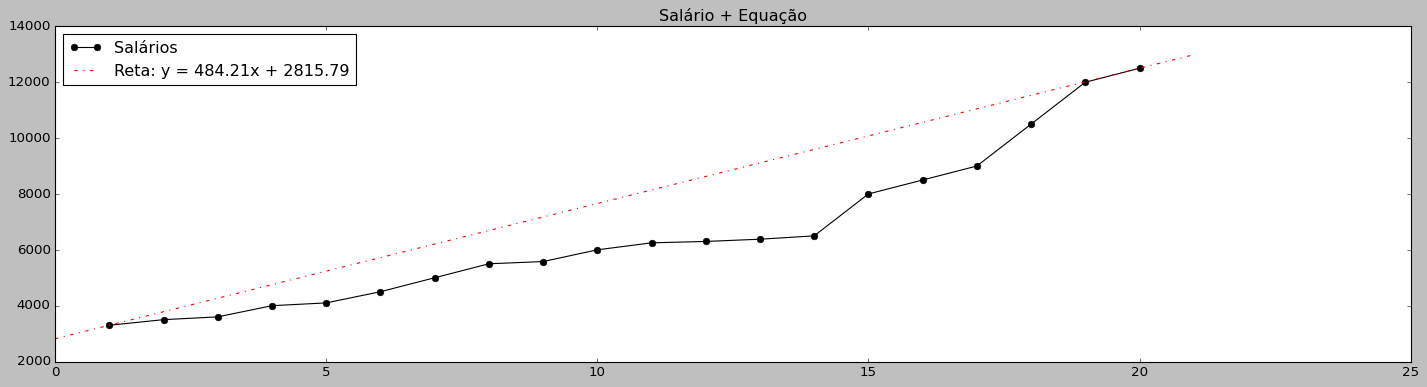

In [17]:
plt.style.use("classic")

plt.figure(figsize = (18, 5))

plt.title("Salário + Equação")
plt.plot(X, y, color = 'black', marker = 'o', label = 'Salários')
plt.plot(X_values, y_values, color = 'red', linestyle = '-.',
         label = "Reta: y = {:.2f}x + {:.2f}".format(m, b))

plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

# Parte 3 : Treinando um regressor e plotando a reta no gráfico

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
X, y

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 array([ 3300,  3500,  3600,  4000,  4100,  4500,  5000,  5500,  5580,
         6000,  6250,  6300,  6380,  6500,  8000,  8500,  9000, 10500,
        12000, 12500]))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [25]:
X_train, X_test

(array([ 9,  6, 12,  4, 19, 17, 14,  3, 10, 20,  5, 13,  8, 11, 15,  7]),
 array([ 1, 18, 16,  2]))

In [26]:
y_train, y_test

(array([ 5580,  4500,  6300,  4000, 12000,  9000,  6500,  3600,  6000,
        12500,  4100,  6380,  5500,  6250,  8000,  5000]),
 array([ 3300, 10500,  8500,  3500]))

In [27]:
# Vamos construir a reta com base nesses dados
### Dados de Teste

m_test = ( (max(y) - min(y))  / (max(X_test) - min(X_test)))
m_test

541.1764705882352

In [29]:
b_test = np.min(y_test) - m * np.min(X_test)
b_test

2815.7894736842104

In [31]:
m, b, m_test, b_test

(484.2105263157895, 2815.7894736842104, 541.1764705882352, 2815.7894736842104)

In [32]:
X_values_test = [np.min(X_test) - 1, np.max(X_test) + 1]
X_values_test, type(X_values_test)

([0, 19], list)

In [33]:
y_values_test = [m_test * x_val_test + b_test for x_val_test in X_values_test]
y_values_test, type(y_values_test)

([2815.7894736842104, 13098.14241486068], list)

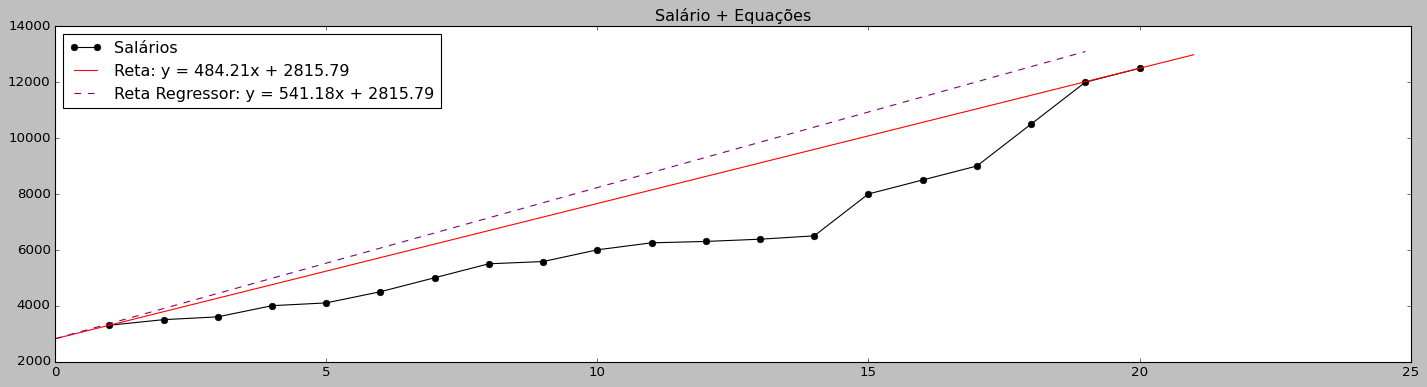

In [36]:
plt.style.use("classic")

plt.figure(figsize = (18, 5))

plt.title("Salário + Equações")
plt.plot(X, y, color = 'black', marker = 'o', label = 'Salários')

## Reta sem o Regressor Linear
plt.plot(X_values, y_values, color = 'red', linestyle = '-',
         label = "Reta: y = {:.2f}x + {:.2f}".format(m, b))

## Reta com o Regressor Linear
plt.plot(X_values_test, y_values_test, color = 'purple', linestyle = '--',
         label = "Reta Regressor: y = {:.2f}x + {:.2f}".format(m_test, b_test))


plt.legend(loc="upper left")
plt.tight_layout()
plt.show()